<a href="https://colab.research.google.com/github/poorvis885/Portfolio/blob/main/ExploratoryDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

<ipython-input-1-eb0cdd04ade2>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-1-eb0cdd04ade2>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

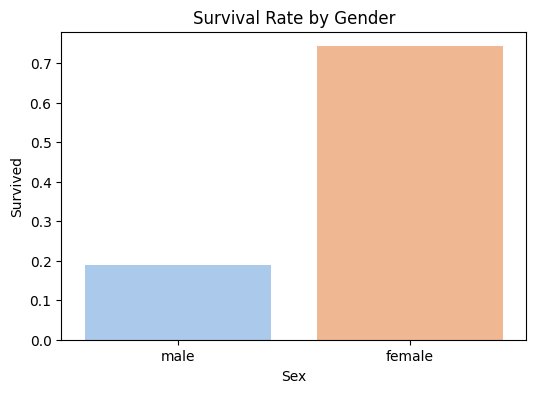

<ipython-input-1-eb0cdd04ade2>:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, ci=None, palette='pastel')
<ipython-input-1-eb0cdd04ade2>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, ci=None, palette='pastel')


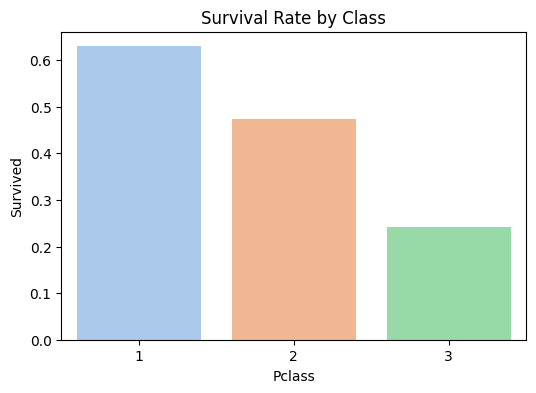

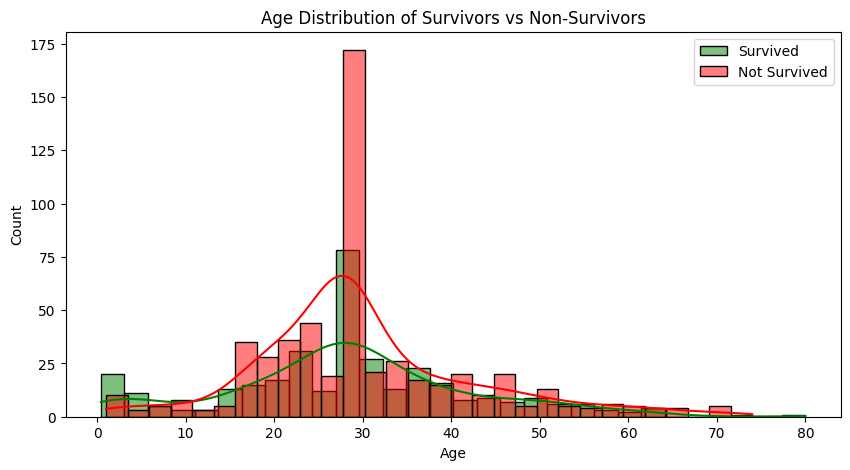

Chi-square test: p-value = 1.1973570627755645e-58
Gender and survival rate are dependent (statistically significant).
T-test: p-value = 0.058309159977757444
No significant age difference between survivors and non-survivors.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind

# Load the dataset from the given URL
data_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(data_url)

# Display basic information
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Fill missing age values with median
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True)  # Drop irrelevant columns

# Visualizing survival rate by gender
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=df, ci=None, palette='pastel')
plt.title('Survival Rate by Gender')
plt.show()

# Visualizing survival rate by class
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=df, ci=None, palette='pastel')
plt.title('Survival Rate by Class')
plt.show()

# Age distribution of survivors vs. non-survivors
plt.figure(figsize=(10,5))
sns.histplot(df[df['Survived'] == 1]['Age'], bins=30, color='green', kde=True, label='Survived')
sns.histplot(df[df['Survived'] == 0]['Age'], bins=30, color='red', kde=True, label='Not Survived')
plt.legend()
plt.title('Age Distribution of Survivors vs Non-Survivors')
plt.show()

# Hypothesis Testing
# 1. Chi-square test for survival and gender
contingency_table = pd.crosstab(df['Sex'], df['Survived'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square test: p-value = {p}")
if p < 0.05:
    print("Gender and survival rate are dependent (statistically significant).")
else:
    print("No significant dependency between gender and survival.")

# 2. T-test for age of survivors vs non-survivors
survived_ages = df[df['Survived'] == 1]['Age']
non_survived_ages = df[df['Survived'] == 0]['Age']
t_stat, p_value = ttest_ind(survived_ages, non_survived_ages, equal_var=False)
print(f"T-test: p-value = {p_value}")
if p_value < 0.05:
    print("There is a significant age difference between survivors and non-survivors.")
else:
    print("No significant age difference between survivors and non-survivors.")
